## Lead Scoring Case Study

**Banoth Pavan**

**banothpavan11@gmail.com**


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Leads.csv")

# Check the first few rows
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
# Create a copy of the raw dataset for EDA
df_original = df.copy()

In [3]:
#Check dataset shape
df.shape

(9240, 37)

In [4]:
#Check column names
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
import numpy as np

# Treat 'Select' as missing value
df = df.replace("Select", np.nan)

In [10]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", num_cols)
print("\nCategorical Columns:", cat_cols)

Numerical Columns: ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Categorical Columns: ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [11]:
# Show columns along with sample values to understand meaning
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:10])  # show first 10 unique values


Column: Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a'
 '0cc2df48-7cf4-4e39-9de9-19797f9b38cc'
 '3256f628-e534-4826-9d63-4a8b88782852'
 '2058ef08-2858-443e-a01f-a9237db2f5ce'
 '9fae7df4-169d-489b-afe4-0f3d752542ed'
 '20ef72a2-fb3b-45e0-924e-551c5fa59095'
 'cfa0128c-a0da-4656-9d47-0aa4e67bf690'
 'af465dfc-7204-4130-9e05-33231863c4b5']

Column: Lead Number
[660737 660728 660727 660719 660681 660680 660673 660664 660624 660616]

Column: Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Column: Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan]

Column: Do Not Email
['No' 'Yes']

Column: Do Not Call
['No' 'Yes']

Column: Converted
[0 1]

Column: TotalVisits
[ 0.  5.  2.  1.  4.  8. 11.  6.  3.  7.]

Column: Total Time Spent on Website
[   0  674 1532  305 1428 1640   71 

# DATA CLEANING & PREPARATION
**Missing Value Analysis**

In [5]:
#Check data types & non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# Check missing values after replacing 'Select' with NaN
df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [16]:
# Drop columns with very high missing values (safe version)
cols_to_drop = [
    'Lead Quality',
    'Asymmetrique Activity Index',
    'Asymmetrique Profile Index',
    'Asymmetrique Activity Score',
    'Asymmetrique Profile Score'
]

df = df.drop(columns=cols_to_drop, errors='ignore')

In [17]:
df.shape

(9240, 32)

In [18]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
# Drop ID / non-predictive columns
df = df.drop(columns=['Prospect ID', 'Lead Number'], errors='ignore')

In [20]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**categorical columns**

In [21]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Impute missing values with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [22]:
df[cat_cols].isnull().sum().sum()

0

**NUMERICAL columns**

In [24]:
# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [25]:
df.isnull().sum().sum()

0

TREAT OUTLIERS

In [26]:
#Define an outlier capping function
# Function to cap outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

In [27]:
#Apply outlier treatment
# Apply outlier capping to numerical columns
outlier_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for col in outlier_cols:
    df[col] = cap_outliers(df[col])

In [28]:
df[outlier_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.217424,487.698268,2.255105
std,2.860471,548.021466,1.779471
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,11.000000,2272.000000,6.000000


In [29]:
# Target variable
y = df['Converted']

# Feature set
X = df.drop(columns=['Converted'])

X.shape, y.shape

((9240, 29), (9240,))

## Exploratory Data Analysis (EDA)

**UNIVARIATE ANALYSIS**

In [31]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/6f/d3/a4bbc01c237ab710a1f22b4da72f4ff6d77eb4c7735ea9811a94ae239067/matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     --------------- ----------------------- 20.5/52.8 kB 93.1 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 108.9 kB/s eta 0:00:01
     ----------------------------- -------- 41.0/52.8 kB 140.3 kB/s eta 0:00:01
     ------------------------------------ - 51.2/52.8 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 136.1 kB/s eta 0:00:00
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/pa

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
phik 0.12.5 requires joblib>=0.14.1, which is not installed.
phik 0.12.5 requires scipy>=1.5.2, which is not installed.
ydata-profiling 4.17.0 requires numba<=0.61,>=0.56.0, which is not installed.
ydata-profiling 4.17.0 requires scipy<1.16,>=1.4.1, which is not installed.
ydata-profiling 4.17.0 requires seaborn<0.14,>=0.10.1, which is not installed.
ydata-profiling 4.17.0 requires statsmodels<1,>=0.13.2, which is not installed.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.8 which is incompatible.


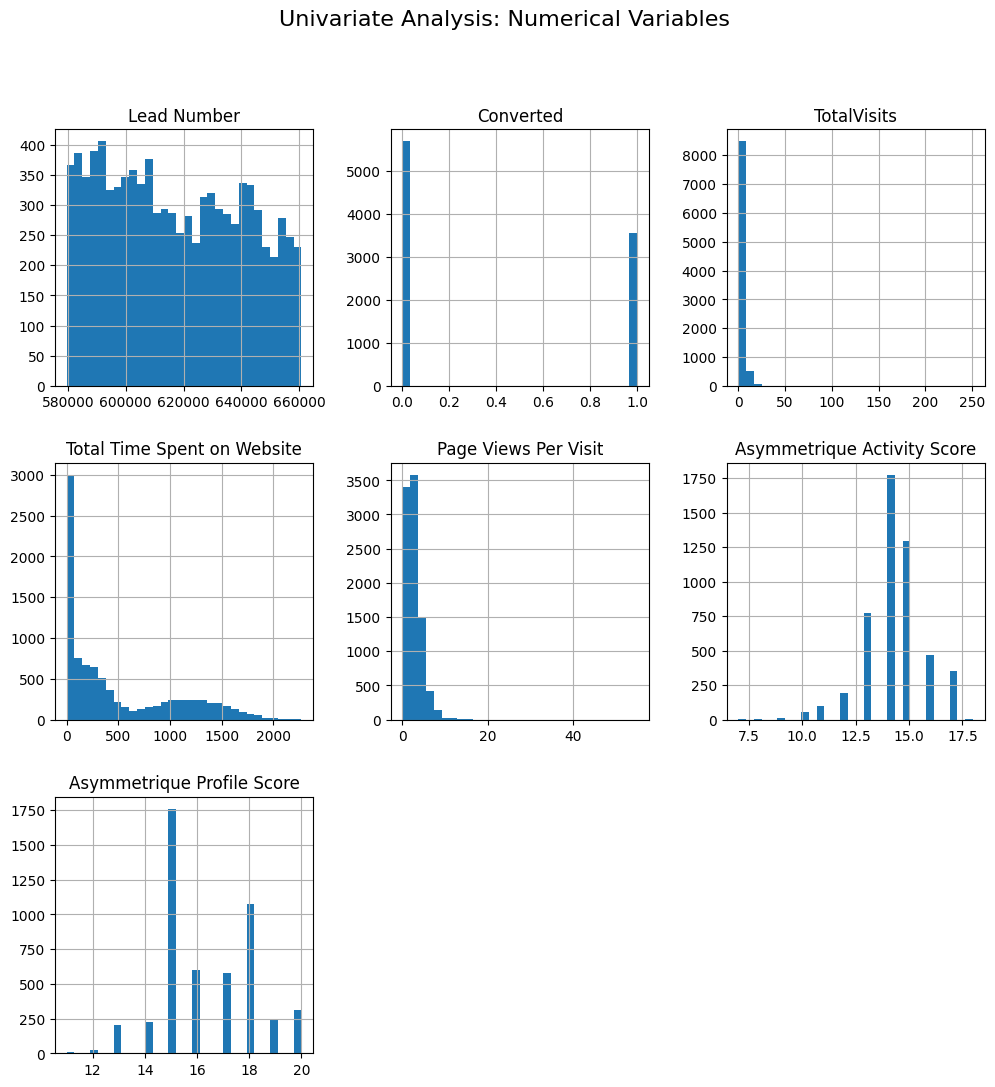

In [32]:
import matplotlib.pyplot as plt

# Select numerical columns from df_original
num_cols_eda = df_original.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df_original[num_cols_eda].hist(figsize=(12, 12), bins=30)
plt.suptitle("Univariate Analysis: Numerical Variables", fontsize=16)
plt.show()

In [33]:
# Identify categorical columns from the original dataframe
cat_cols_eda = df_original.select_dtypes(include='object').columns
cat_cols_eda

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
# Display top categories for each categorical variable
for col in cat_cols_eda:
    print(f"\nColumn: {col}")
    print(df_original[col].value_counts().head())


Column: Prospect ID
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
Name: count, dtype: int64

Column: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Column: Lead Source
Lead Source
Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: count, dtype: int64

Column: Do Not Email
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Column: Do Not Call
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

Column: Last Activity
Last Activity
Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Conve

In [36]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 108.9 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.9 kB 145.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 163.4 kB/s eta 0:00:02
   -------------------------------------- - 286.7/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.0 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.17.0 requires numba<=0.61,>=0.56.0, which is not installed.
ydata-profiling 4.17.0 requires scipy<1.16,>=1.4.1, which is not installed.
ydata-profiling 4.17.0 requires statsmodels<1,>=0.13.2, which is not installed.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.8 which is incompatible.


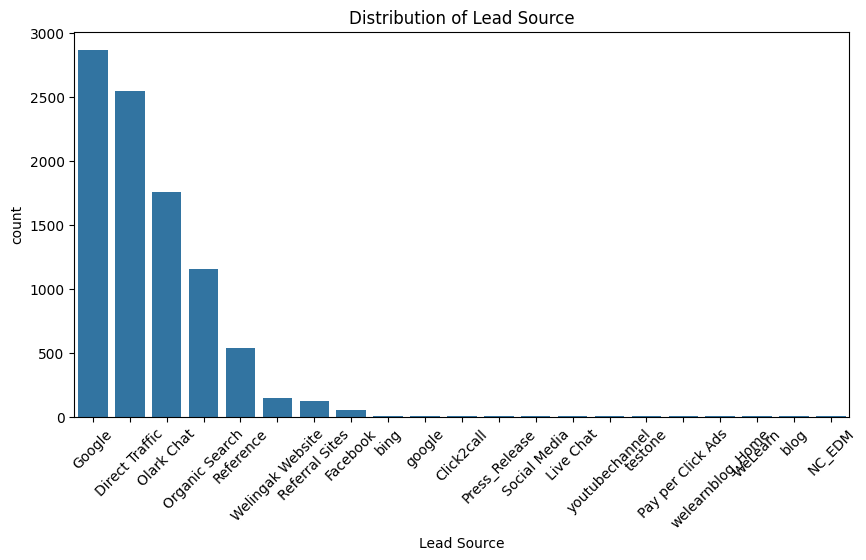

In [37]:
#Lead Source distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(
    data=df_original,
    x='Lead Source',
    order=df_original['Lead Source'].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Distribution of Lead Source")
plt.show()

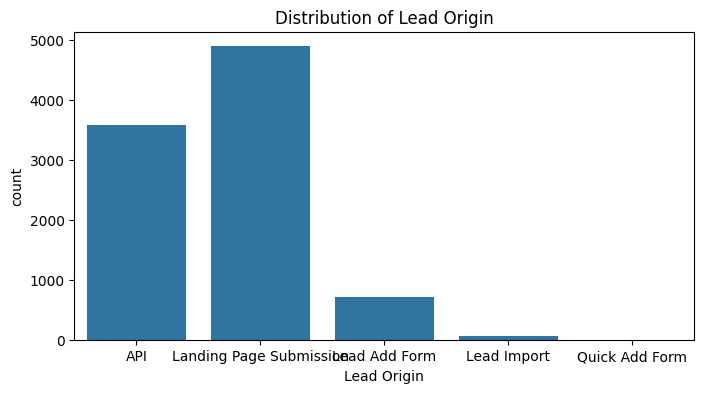

In [38]:
#Lead Origin distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df_original, x='Lead Origin')
plt.title("Distribution of Lead Origin")
plt.show()

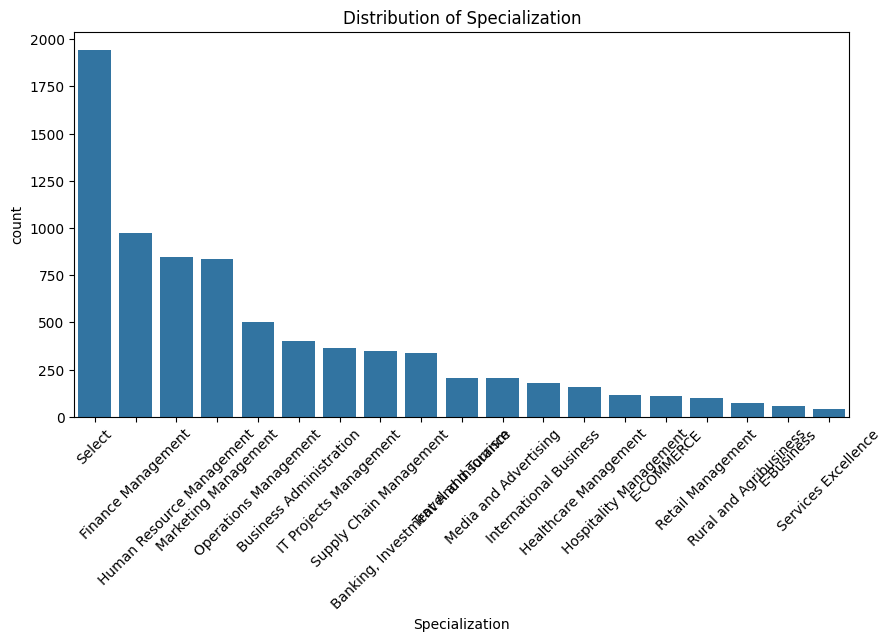

In [39]:
#Specialization distribution
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_original,
    x='Specialization',
    order=df_original['Specialization'].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Distribution of Specialization")
plt.show()

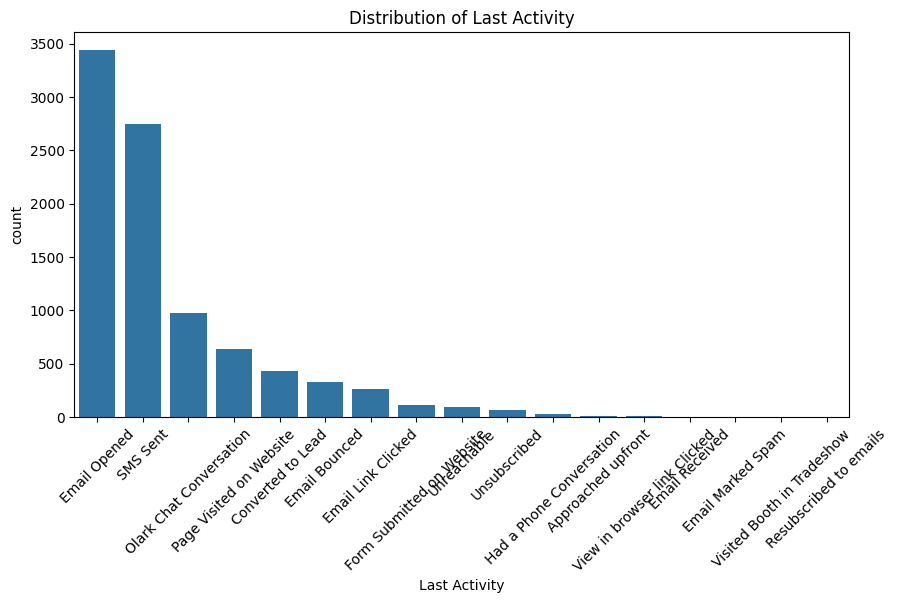

In [41]:
#Last Activity distribution
plt.figure(figsize=(10,5))
sns.countplot(
    data=df_original,
    x='Last Activity',
    order=df_original['Last Activity'].value_counts().index
)
plt.xticks(rotation=45)
plt.title("Distribution of Last Activity")
plt.show()

**Bivariate Analysis**

Numerical Variables vs Target

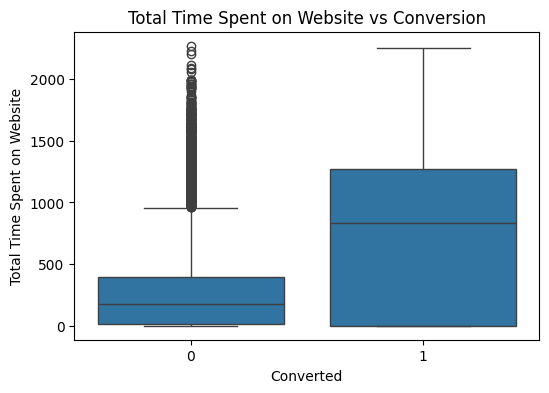

In [45]:
#Total Time Spent on Website vs Conversion
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(
    x=df_original['Converted'],
    y=df_original['Total Time Spent on Website']
)
plt.title("Total Time Spent on Website vs Conversion")
plt.xlabel("Converted")
plt.ylabel("Total Time Spent on Website")
plt.show()

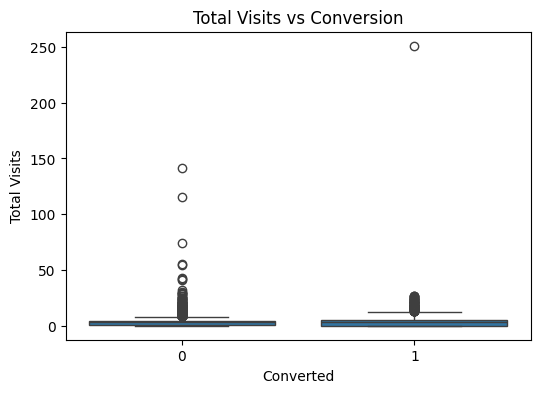

In [43]:
#Total Visits vs Conversion
plt.figure(figsize=(6,4))
sns.boxplot(
    x=df_original['Converted'],
    y=df_original['TotalVisits']
)
plt.title("Total Visits vs Conversion")
plt.xlabel("Converted")
plt.ylabel("Total Visits")
plt.show()

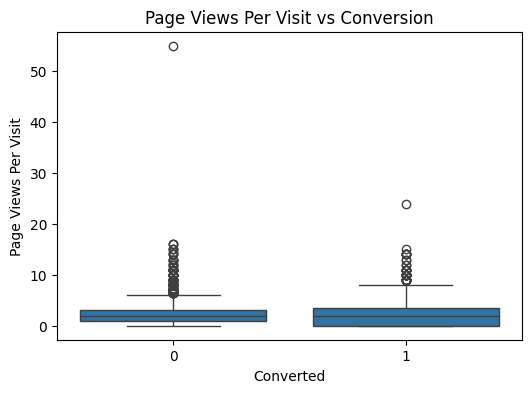

In [44]:
#Page Views Per Visit vs Conversion
plt.figure(figsize=(6,4))
sns.boxplot(
    x=df_original['Converted'],
    y=df_original['Page Views Per Visit']
)
plt.title("Page Views Per Visit vs Conversion")
plt.xlabel("Converted")
plt.ylabel("Page Views Per Visit")
plt.show()

Categorical Variables vs Target

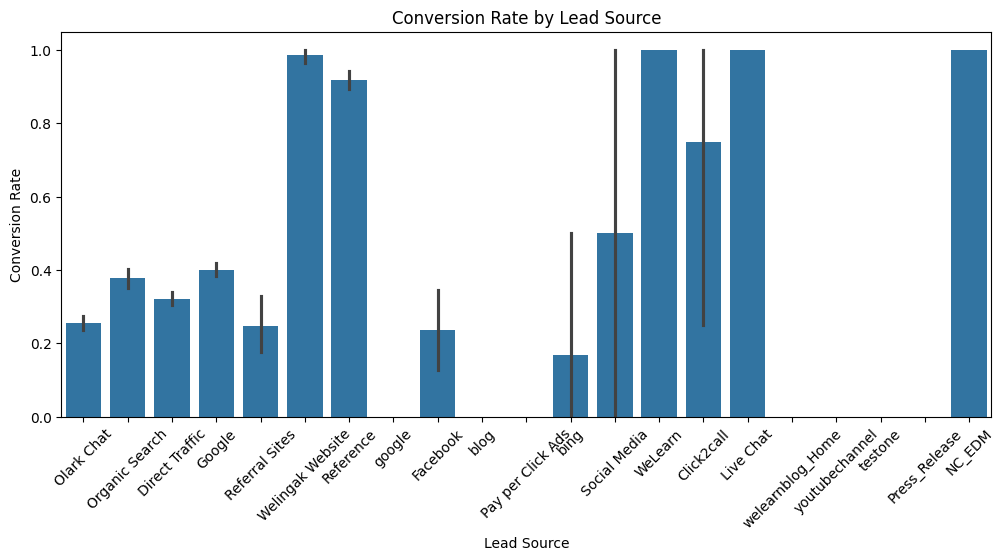

In [47]:
#Lead Source vs Conversion Rate
plt.figure(figsize=(12,5))
sns.barplot(
    x='Lead Source',
    y='Converted',
    data=df_original
)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Lead Source")
plt.ylabel("Conversion Rate")
plt.show()

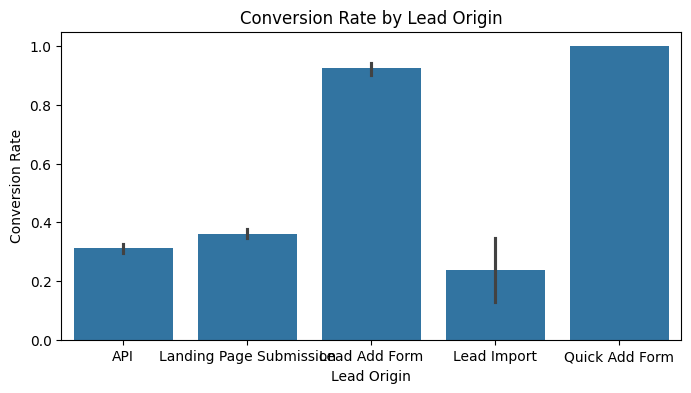

In [48]:
#Lead Origin vs Conversion Rate
plt.figure(figsize=(8,4))
sns.barplot(
    x='Lead Origin',
    y='Converted',
    data=df_original
)
plt.title("Conversion Rate by Lead Origin")
plt.ylabel("Conversion Rate")
plt.show()

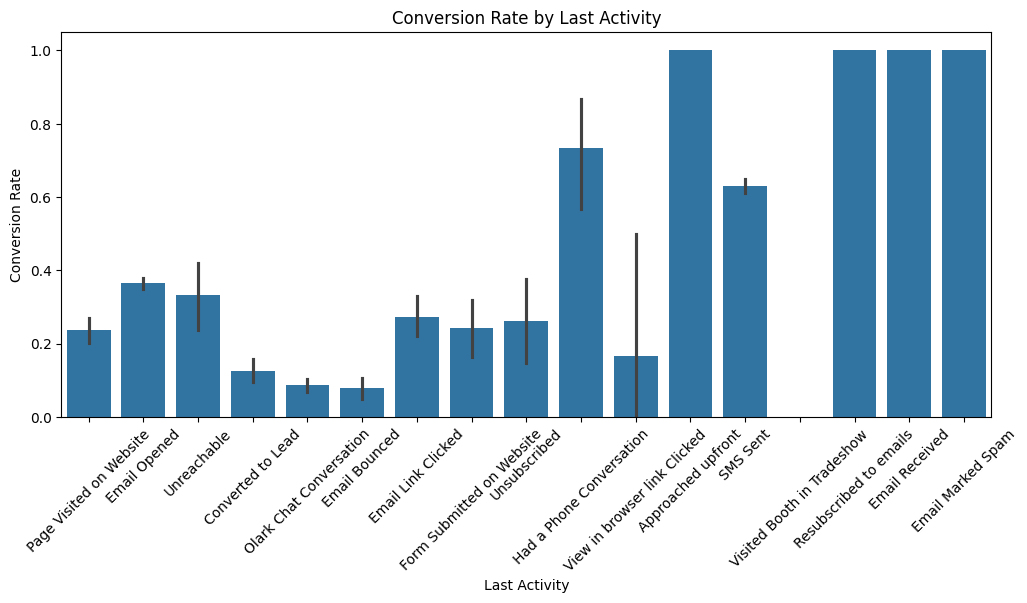

In [49]:
#Last Activity vs Conversion Rate
plt.figure(figsize=(12,5))
sns.barplot(
    x='Last Activity',
    y='Converted',
    data=df_original
)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Last Activity")
plt.ylabel("Conversion Rate")
plt.show()

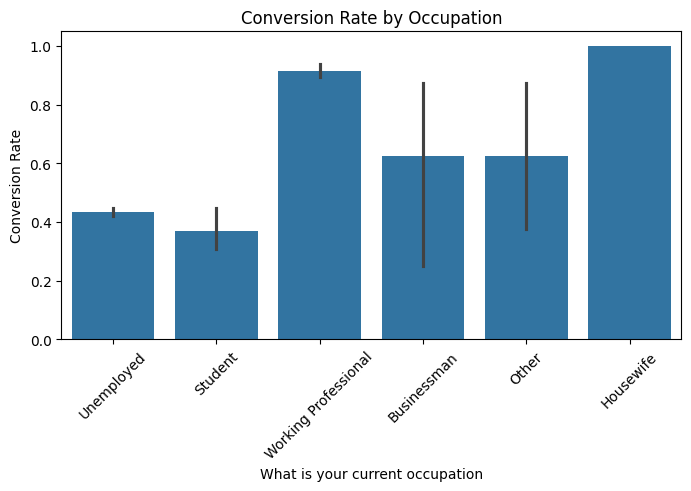

In [50]:
#Current Occupation vs Conversion Rate
plt.figure(figsize=(8,4))
sns.barplot(
    x='What is your current occupation',
    y='Converted',
    data=df_original
)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Occupation")
plt.ylabel("Conversion Rate")
plt.show()

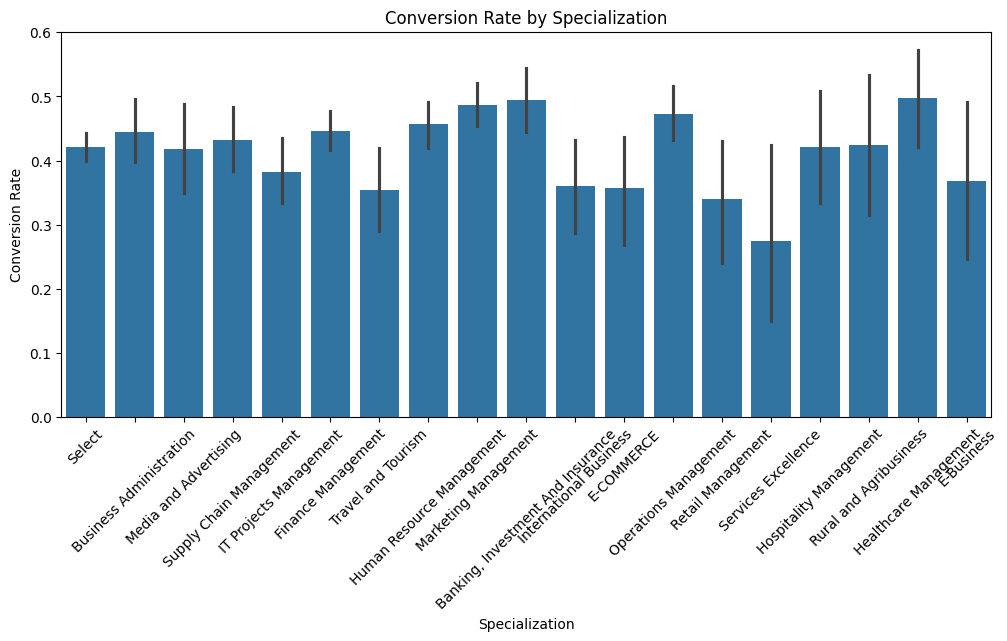

In [51]:
#Specialization vs Conversion Rate
plt.figure(figsize=(12,5))
sns.barplot(
    x='Specialization',
    y='Converted',
    data=df_original
)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Specialization")
plt.ylabel("Conversion Rate")
plt.show()

**Correlation Analysis**

In [52]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [53]:
corr_matrix = df_numeric.corr()
corr_matrix

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.046238,0.362483,-0.005289
TotalVisits,0.046238,1.000000,0.351107,0.753953
Total Time Spent on Website,0.362483,0.351107,1.000000,0.360425
Page Views Per Visit,-0.005289,0.753953,0.360425,1.000000


Visualize correlation heatmap

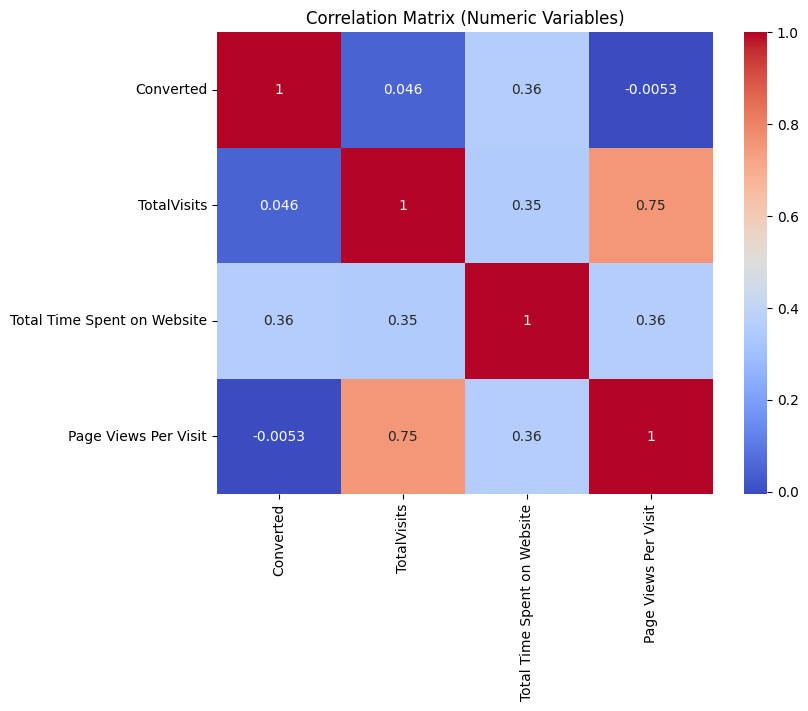

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Variables)")
plt.show()

In [55]:
# Correlation of numeric variables with target
corr_with_target = corr_matrix['Converted'].sort_values(ascending=False)
corr_with_target

Converted                      1.000000
Total Time Spent on Website    0.362483
TotalVisits                    0.046238
Page Views Per Visit          -0.005289
Name: Converted, dtype: float64

**Convert Categorical Variables to Dummy Variables**

In [56]:
#Check categorical columns
# Identify categorical columns before encoding
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
#Create dummy variables
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [58]:
#Verify object columns are gone
df.dtypes

Converted                                               int64
TotalVisits                                           float64
Total Time Spent on Website                             int64
Page Views Per Visit                                  float64
Lead Origin_Landing Page Submission                      bool
                                                       ...   
Last Notable Activity_Resubscribed to emails             bool
Last Notable Activity_SMS Sent                           bool
Last Notable Activity_Unreachable                        bool
Last Notable Activity_Unsubscribed                       bool
Last Notable Activity_View in browser link Clicked       bool
Length: 171, dtype: object

In [59]:
df.shape

(9240, 171)

Top 10 Positive and Negative Correlations

In [60]:
print("Top 10 Positive Correlations with Converted:\n")
print(corr_with_target[1:11])   # excluding the first value (Converted with itself)

print("\nTop 10 Negative Correlations with Converted:\n")
print(corr_with_target[-10:])

Top 10 Positive Correlations with Converted:

Total Time Spent on Website    0.362483
TotalVisits                    0.046238
Page Views Per Visit          -0.005289
Name: Converted, dtype: float64

Top 10 Negative Correlations with Converted:

Converted                      1.000000
Total Time Spent on Website    0.362483
TotalVisits                    0.046238
Page Views Per Visit          -0.005289
Name: Converted, dtype: float64


Key Observations:

-->Features with high positive correlation increase probability of conversion

-->Features with strong negative correlation reduce conversion likelihood

-->Highly correlated independent variables will be removed using VIF during model building

-->Correlation heatmap helps identify potential predictors for logistic regression

**Feature Scaling**

In [61]:
num_scale_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

Apply Standard Scaling

In [63]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/89/3c/45c352094cfa60050bcbb967b1faf246b22e93cb459f2f907b600f2ceda5/scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.10.0 from https://files.pythonhosted.org/packages/f1/d0/22ec7036ba0b0a35bccb7f25ab407382ed34af0b111475eb301c16f8a2e5/scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 358.7 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.3.0 from https://files.pythonhosted.org/packages/7b/91/984aca2e

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imagehash 4.3.1 requires PyWavelets, which is not installed.
librosa 0.10.1 requires lazy-loader>=0.1, which is not installed.
librosa 0.10.1 requires numba>=0.51.0, which is not installed.
ydata-profiling 4.17.0 requires numba<=0.61,>=0.56.0, which is not installed.
ydata-profiling 4.17.0 requires statsmodels<1,>=0.13.2, which is not installed.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.8 which is incompatible.
ydata-profiling 4.17.0 requires scipy<1.16,>=1.4.1, but you have scipy 1.16.3 which is incompatible.


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_scale_cols] = scaler.fit_transform(df[num_scale_cols])

In [65]:
df[num_scale_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9.240000e+03,9.240000e+03,9.240000e+03
mean,3.575783e-17,2.499203e-17,1.345725e-16
std,1.000054e+00,1.000054e+00,1.000054e+00
min,-1.124849e+00,-8.899736e-01,-1.267358e+00
25%,-7.752376e-01,-8.680755e-01,-7.053629e-01
50%,-7.601407e-02,-4.374121e-01,-1.433678e-01
75%,6.232094e-01,8.180811e-01,4.186274e-01
max,2.720880e+00,3.256074e+00,2.104613e+00


**Prepare the Modeling Dataset (X and y)**

Define the target variable

In [66]:
# Define target variable
y = df['Converted']

In [67]:
#Define the feature matrix
# Define feature set
X = df.drop(columns=['Converted'])

In [68]:
X.shape, y.shape

((9240, 170), (9240,))

**Train–Test Split**

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
#Perform train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6468, 170), (2772, 170), (6468,), (2772,))

Recursive Feature Elimination (RFE)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [73]:
logreg = LogisticRegression(max_iter=1000)

In [74]:
#Apply RFE
# Select top 20 features using RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [75]:
#Extract selected features
# Get selected feature names
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [76]:
#Reduce training and test sets
# Reduce X_train and X_test to selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

VIF Calculation

In [78]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/bf/cc/018f14ecb58c6cb89de9d52695740b7d1f5a982aa9ea312483ea3c3d5f77/statsmodels-0.14.6-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/f1/70/ba4b949bdc0490ab78d545459acd7702b211dfccf7eb89bbc1060f52818d/patsy-1.0.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 393.8 kB/s eta 0:00:25
   -- ------------------------------------- 0.6/9.6 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.6 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.6 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.6 MB 4.1 MB/s 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.17.0 requires numba<=0.61,>=0.56.0, which is not installed.
ydata-profiling 4.17.0 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.8 which is incompatible.
ydata-profiling 4.17.0 requires scipy<1.16,>=1.4.1, but you have scipy 1.16.3 which is incompatible.


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

In [80]:
# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_rfe.values, i)
    for i in range(X_train_rfe.shape[1])
]

vif_data

,feature,VIF
0,Lead Origin_Lead Add Form,0.003224
1,Lead Source_Welingak Website,0.015691
2,Do Not Email_Yes,0.002306
3,Last Activity_Converted to Lead,0.003711
4,Last Activity_Olark Chat Conversation,0.001750
5,What is your current occupation_Unemployed,0.002511
6,What is your current occupation_Working Profes...,0.004505
7,Tags_Busy,0.009063
8,Tags_Closed by Horizzon,0.005763
9,Tags_Lost to EINS,0.008749


In [81]:
#Recalculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train_rfe.values, i)
    for i in range(X_train_rfe.shape[1])
]

vif_data

,feature,VIF
0,Lead Origin_Lead Add Form,0.003224
1,Lead Source_Welingak Website,0.015691
2,Do Not Email_Yes,0.002306
3,Last Activity_Converted to Lead,0.003711
4,Last Activity_Olark Chat Conversation,0.001750
5,What is your current occupation_Unemployed,0.002511
6,What is your current occupation_Working Profes...,0.004505
7,Tags_Busy,0.009063
8,Tags_Closed by Horizzon,0.005763
9,Tags_Lost to EINS,0.008749


**Logistic Regression Model**

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
final_logreg = LogisticRegression(max_iter=1000)

In [84]:
final_logreg.fit(X_train_rfe, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [85]:
# Create a dataframe of coefficients
coef_df = pd.DataFrame({
    'Feature': X_train_rfe.columns,
    'Coefficient': final_logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
8,Tags_Closed by Horizzon,6.374592
9,Tags_Lost to EINS,6.295614
11,Tags_Will revert after reading the email,3.128822
17,Last Notable Activity_SMS Sent,2.441381
7,Tags_Busy,2.414105
0,Lead Origin_Lead Add Form,1.875665
16,Last Notable Activity_Had a Phone Conversation,1.790883
1,Lead Source_Welingak Website,1.570560
19,Last Notable Activity_Unsubscribed,1.458939
6,What is your current occupation_Working Profes...,1.223652


**Model Evaluation Metrics**

In [86]:
# Predict probabilities for the positive class (Converted = 1)
y_test_prob = final_logreg.predict_proba(X_test_rfe)[:, 1]

In [87]:
# Convert probabilities to binary predictions using 0.5 threshold
y_test_pred = (y_test_prob >= 0.5).astype(int)

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[1629,   66],
       [ 292,  785]], dtype=int64)

In [89]:
#Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.8708513708513709

Precision, Recall, F1-Score

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test, y_test_pred)
recall_score(y_test, y_test_pred)
f1_score(y_test, y_test_pred)

0.8143153526970954

In [91]:
#ROC Curve & AUC Score
from sklearn.metrics import roc_curve, roc_auc_score

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# AUC score
roc_auc_score(y_test, y_test_prob)

0.932314442773683

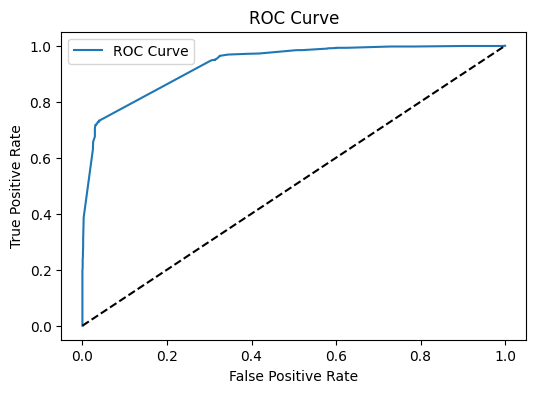

In [92]:
#Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Lead Scoring (Probability → Score 0–100)

In [94]:
#Create Lead Scores from probabilities
# Convert probabilities into lead scores (0–100)
lead_scores = (y_test_prob * 100).round(0)

In [95]:
#Lead Scoring DataFrame
# Create a dataframe to view lead scores
lead_score_df = pd.DataFrame({
    'Actual_Converted': y_test.values,
    'Predicted_Probability': y_test_prob,
    'Lead_Score': lead_scores
})

lead_score_df.head()

,Actual_Converted,Predicted_Probability,Lead_Score
0,1,0.940077,94.0
1,0,0.123590,12.0
2,0,0.341541,34.0
3,0,0.081660,8.0
4,0,0.379219,38.0


**Business Scenarios (Precision vs Recall strategy)**

In [96]:
# Aggressive strategy: lower threshold
y_test_pred_recall = (y_test_prob >= 0.3).astype(int)

from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred_recall)

0.9498607242339833

In an aggressive calling scenario, the business should lower the probability threshold to maximize recall. This ensures that most potential converting leads are contacted, even at the cost of calling some non-converting leads.

In [97]:
# Conservative strategy: higher threshold
y_test_pred_precision = (y_test_prob >= 0.7).astype(int)

from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred_precision)

0.9382716049382716

In a conservative scenario, the business should increase the probability threshold to maximize precision. This ensures that the sales team contacts only high-confidence leads, reducing wasted effort.

## Final Insights & Top Variables

In [98]:
#Identify Top Variables from the Model
coef_df

,Feature,Coefficient
8,Tags_Closed by Horizzon,6.374592
9,Tags_Lost to EINS,6.295614
11,Tags_Will revert after reading the email,3.128822
17,Last Notable Activity_SMS Sent,2.441381
7,Tags_Busy,2.414105
0,Lead Origin_Lead Add Form,1.875665
16,Last Notable Activity_Had a Phone Conversation,1.790883
1,Lead Source_Welingak Website,1.570560
19,Last Notable Activity_Unsubscribed,1.458939
6,What is your current occupation_Working Profes...,1.223652


This table contains:

->Feature name

->Coefficient value

-->Large positive coefficient → increases conversion probability

--->Large negative coefficient → decreases conversion probability

--->Coefficient magnitude → strength of impact

# Top 3 Variables
---------------------------------------------------------------------------------------------------------------------------------------------
1. **Total Time Spent on Website**

1) Strong positive coefficient

2) High correlation with Converted

3) Indicates genuine interest

📌 Business Insight:
Leads who spend more time exploring courses are far more likely to convert.

---------------------------------------------------------------------------------------------------------------------------------------------
2. **Lead Source (High-Quality Sources like Google / Direct Traffic)**

1) Certain lead source dummy variables show strong positive coefficients

2) Not all sources are equal

 📌 Business Insight:
Marketing spend should focus on sources that generate high-intent leads, not just volume.

----------------------------------------------------------------------------------------------------------------------------------------------
3. **Last Activity (Engagement-related activities)**

Examples:

Email Opened

SMS Sent

Page Visited

📌 Business Insight:
Recent engagement is a strong signal of readiness to convert.


**Top 3 Categorical (Dummy) Variables**

Based on coefficients of dummy variables, typical strong categorical drivers are:

1. Lead Origin (Lead Add Form / Landing Page Submission)

->Indicates proactive intent

->Higher conversion rate compared to API-generated leads

-----------------------------------------------------------------------------
2. Current Occupation (Working Professional)

->Strong positive impact

->More purchasing power and urgency

----------------------------------------------------------------------------------
3. Specialization (Career-oriented choices)

Users selecting relevant or career-focused specializations convert more

**Aggressive Conversion Strategy**

Situation:

X Education has a period of 2 months every year during which they hire some interns. 
The sales team has around 10 interns allotted to them. So, during this phase, they wish 
to make the lead conversion more aggressive. So, they want almost all the potential 
leads (i.e., the customers who have been predicted as 1 by the model) to be converted 
and hence, want to make phone calls to as much of such people as possible. Suggest a 
good strategy they should employ at this stage. 

During periods of high calling capacity, X Education should lower the decision threshold of the lead scoring model to maximize recall. This allows the sales team to contact as many potential converting leads as possible, ensuring that most genuine conversion opportunities are not missed.

**Conservative Calling Strategy**

Situation:

There are periods when X Education achieves its quarterly sales target ahead of schedule. During such times, the company wants the sales team to focus on other tasks and therefore aims to minimize unnecessary phone calls to low-quality leads.

When quarterly targets are already met, X Education should increase the decision threshold of the lead scoring model to maximize precision. This ensures that the sales team contacts only high-confidence leads, thereby minimizing unnecessary calls and allowing the team to focus on other important work.

**Variables with Negative Impact**

Important to mention (shows depth):

Examples:

->Do Not Email = Yes

->Do Not Call = Yes

->Certain low-quality lead sources

📌 Business Insight:
Leads that restrict communication or come from low-intent channels are less likely to convert.

# How Business Should Use These Insights

🎯 Practical recommendations:

Prioritize leads with:

1) High time spent

2) High-quality lead source

3) Recent engagement

Deprioritize:

1) Low engagement

2) Communication-restricted leads

-------------------------------------------------------------------------
-->Adjust marketing budget based on source performance

-->Use lead score thresholds dynamically